In [2]:
import numpy as np
from progressbar import ProgressBar
from algorithm.algorithms import * 
from bandit_process.arm_generator import *
from matplotlib import pyplot as plt
import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,5)
import os
import math
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.75)

the environment

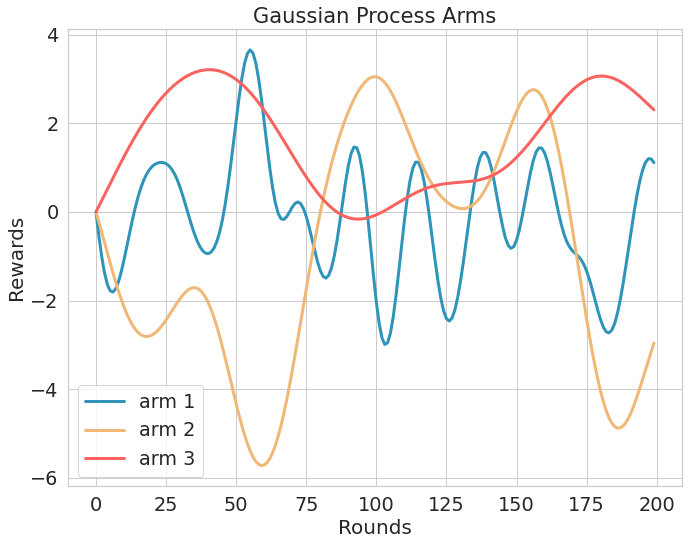

In [2]:
arm1=expect_reward_generator(200,lengthscale=8,variance=5,Smooth=True,Plot=False)
arm2=expect_reward_generator(200,lengthscale=16,variance=5,Smooth=True,Plot=False)
arm3=expect_reward_generator(200,lengthscale=32,variance=5,Smooth=True,Plot=False)

plt.figure(figsize=(10, 8))
plt.plot(arm1,label='arm 1',linewidth=3,color='#2E94B9')
plt.plot(arm2,label='arm 2',linewidth=3,color='#F0B775')
plt.plot(arm3,label='arm 3',linewidth=3,color='#fa625f')
plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Rewards',fontsize=20)
plt.title('Gaussian Process Arms')
plt.tight_layout()
plt.legend()

#plt.savefig('Gaussian Process Arms.png')

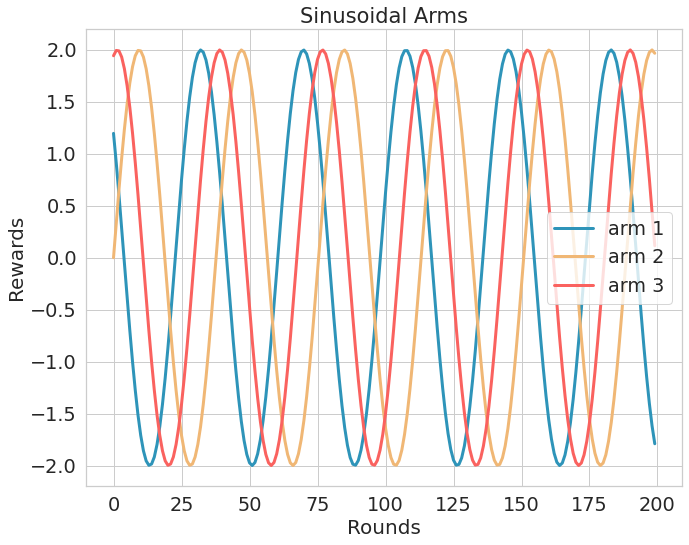

In [3]:
arm1 = expect_reward_generato_sin(200,6,2,15,Plot=False)
arm2 = expect_reward_generato_sin(200,6,2,0,Plot=False)
arm3 = expect_reward_generato_sin(200,6,2,8,Plot=False)


plt.figure(figsize=(10, 8))
plt.plot(arm1,label='arm 1',linewidth=3,color='#2E94B9')
plt.plot(arm2,label='arm 2',linewidth=3,color='#F0B775')
plt.plot(arm3,label='arm 3',linewidth=3,color='#fa625f')
plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Rewards',fontsize=20)
plt.title('Sinusoidal Arms')
plt.tight_layout()
plt.legend()

#plt.savefig('Sinusoidal Arms.png')

Experiment 1

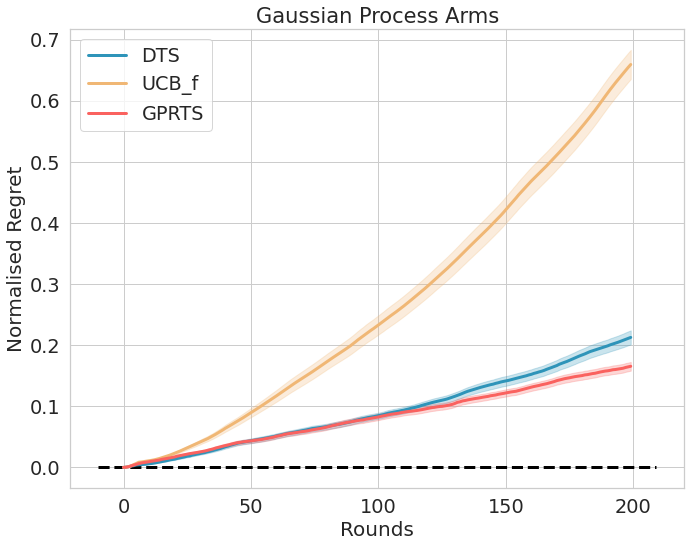

In [4]:
T = 200
N = 100

EF_record = my_data = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment1 data/DTS_record.csv'), delimiter=',')
UCB_record = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment1 data/UCB_record.csv'), delimiter=',')
GPR_mismatch_record = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment1 data/GPR_record.csv'), delimiter=',')


EF_cumsum=np.cumsum(EF_record,axis=1)
UCB_cumsum=np.cumsum(UCB_record,axis=1)
GPR_mismatch_cumsum=np.cumsum(GPR_mismatch_record,axis=1)


EF_cumsum_average=np.mean(EF_cumsum,axis=0)
UCB_cumsum_average=np.mean(UCB_cumsum,axis=0)
GPR_cumsum_mismatch_average=np.mean(GPR_mismatch_cumsum,axis=0)

EF_cumsum_std=np.sqrt(np.var(EF_cumsum,axis=0))/math.sqrt(N)
UCB_cumsum_std=np.sqrt(np.var(UCB_cumsum,axis=0))/math.sqrt(N)
GPR_mismatch_cumsum_std=np.sqrt(np.var(GPR_mismatch_cumsum,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(EF_cumsum_average,linewidth=3,color='#2E94B9',label='DTS')
plt.fill_between(range(T), EF_cumsum_average-EF_cumsum_std, EF_cumsum_average+EF_cumsum_std, color='#2E94B9',alpha=0.25)

plt.plot(UCB_cumsum_average,linewidth=3,color='#F0B775',label='UCB_f')
plt.fill_between(range(T), UCB_cumsum_average-UCB_cumsum_std, UCB_cumsum_average+UCB_cumsum_std ,color='#F0B775',alpha=0.25)


plt.plot(GPR_cumsum_mismatch_average,linewidth=3,color='#fa625f' ,label='GPRTS')
plt.fill_between(range(T), GPR_cumsum_mismatch_average-GPR_mismatch_cumsum_std, GPR_cumsum_mismatch_average+GPR_mismatch_cumsum_std,color='#fa625f', alpha=0.25)

plt.hlines(0, *plt.xlim(), color='black', linestyle='--', linewidth=3, zorder=2)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.title('Gaussian Process Arms')
plt.tight_layout()
plt.legend()


#plt.savefig('GPA_exp.png')


Experiment 2


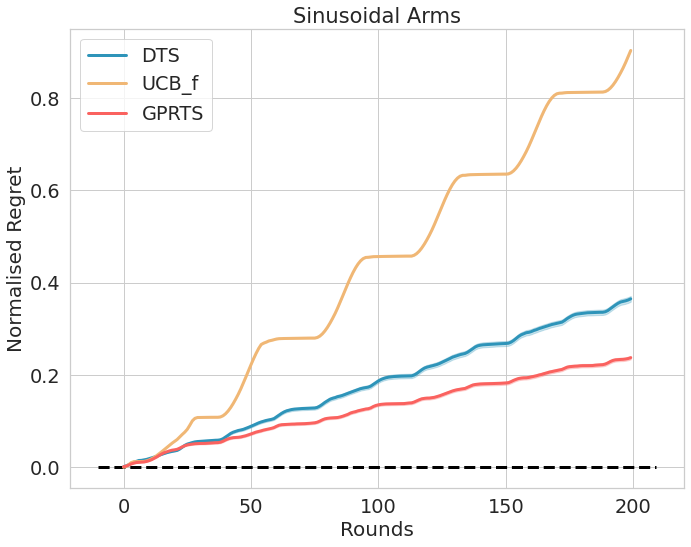

In [5]:
T = 200
N = 100

EF_record  = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment2 data/DTS_record.csv'), delimiter=',')
UCB_record = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment2 data/UCB_record.csv'), delimiter=',')
GPR_record = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment2 data/GPR_record.csv'), delimiter=',')



EF_cumsum=np.cumsum(EF_record,axis=1)
UCB_cumsum=np.cumsum(UCB_record,axis=1)
GPR_cumsum=np.cumsum(GPR_record,axis=1)


EF_cumsum_average=np.mean(EF_cumsum,axis=0)
UCB_cumsum_average=np.mean(UCB_cumsum,axis=0)
GPR_cumsum_average=np.mean(GPR_cumsum,axis=0)

EF_cumsum_std=np.sqrt(np.var(EF_cumsum,axis=0))/math.sqrt(N)
UCB_cumsum_std=np.sqrt(np.var(UCB_cumsum,axis=0))/math.sqrt(N)
GPR_cumsum_std=np.sqrt(np.var(GPR_cumsum,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(EF_cumsum_average,linewidth=3,color='#2E94B9',label='DTS')
plt.fill_between(range(T), EF_cumsum_average-EF_cumsum_std, EF_cumsum_average+EF_cumsum_std,color='#2E94B9', alpha=0.25)

plt.plot(UCB_cumsum_average,linewidth=3,label='UCB_f',color='#F0B775')
plt.fill_between(range(T), UCB_cumsum_average-UCB_cumsum_std, UCB_cumsum_average+UCB_cumsum_std,color='#F0B775', alpha=0.25)

plt.plot(GPR_cumsum_average,linewidth=3,label='GPRTS',color='#fa625f')
plt.fill_between(range(T), GPR_cumsum_average-GPR_cumsum_std, GPR_cumsum_average+GPR_cumsum_std, color='#fa625f',alpha=0.25)

plt.hlines(0, *plt.xlim(), color='black', linestyle='--', linewidth=3, zorder=2)




plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.title('Sinusoidal Arms')
plt.tight_layout()
plt.legend()


#plt.savefig('SA_exp.png')



With Switching Cost

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


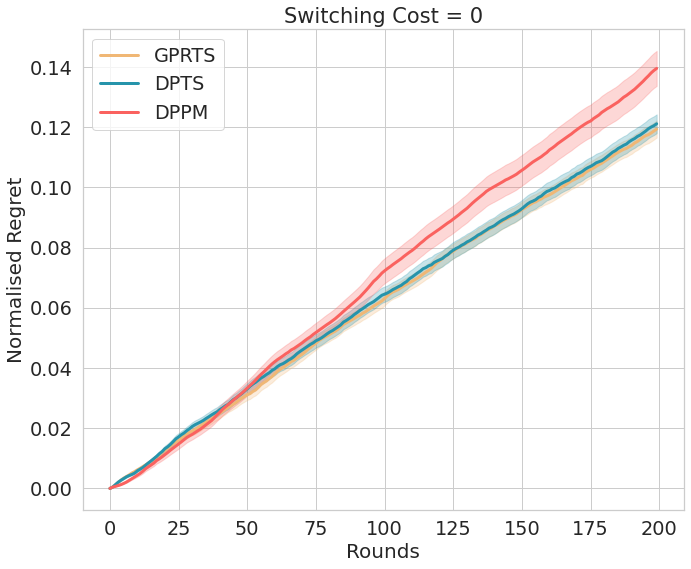

In [3]:
N = 250
T = 200

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment3 data/GPRTS_cost0.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment3 data/DPTS_cost0.csv'), delimiter=',')
regret_record3 = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment3 data/DPPM_cost0.csv'), delimiter=',')

regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)
regret_cumsum3=np.cumsum(regret_record3,axis=1)


cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)
cumsum_average3=np.mean(regret_cumsum3,axis=0)

cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)
cumsum_std3=np.sqrt(np.var(regret_cumsum3,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='GPRTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

plt.plot(cumsum_average2,label='DPTS',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.plot(cumsum_average3,label='DPPM',color='#fa625f',linewidth=3)
plt.fill_between(range(T), cumsum_average3-cumsum_std3, cumsum_average3+cumsum_std3,color='#fa625f', alpha=0.25)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.title('Switching Cost = 0')
plt.legend()

#plt.savefig('SC0.png')

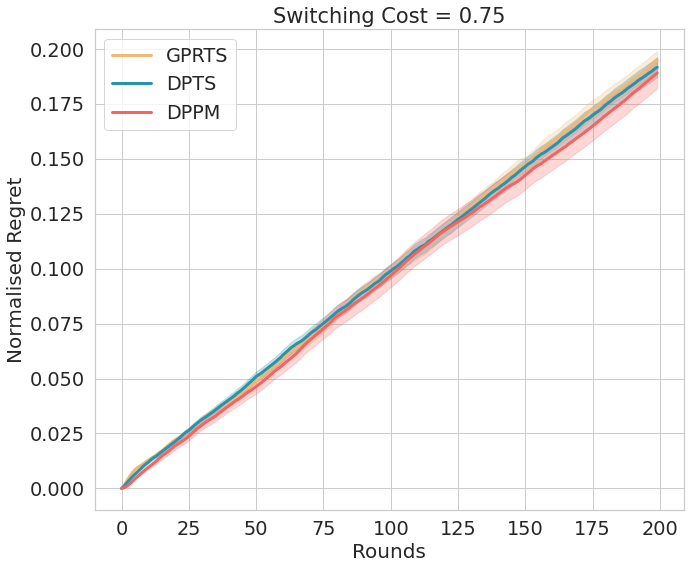

In [5]:
N = 250
T = 200

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment3 data/GPRTS_cost0.75.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment3 data/DPTS_cost075.csv'), delimiter=',')
regret_record3 = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment3 data/DPPM_cost0.75.csv'), delimiter=',')

regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)
regret_cumsum3=np.cumsum(regret_record3,axis=1)


cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)
cumsum_average3=np.mean(regret_cumsum3,axis=0)

cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)
cumsum_std3=np.sqrt(np.var(regret_cumsum3,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='GPRTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

plt.plot(cumsum_average2,label='DPTS',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.plot(cumsum_average3,label='DPPM',color='#fa625f',linewidth=3)
plt.fill_between(range(T), cumsum_average3-cumsum_std3, cumsum_average3+cumsum_std3,color='#fa625f', alpha=0.25)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.title('Switching Cost = 0.75')
plt.legend()

#plt.savefig('SC0.75.png')

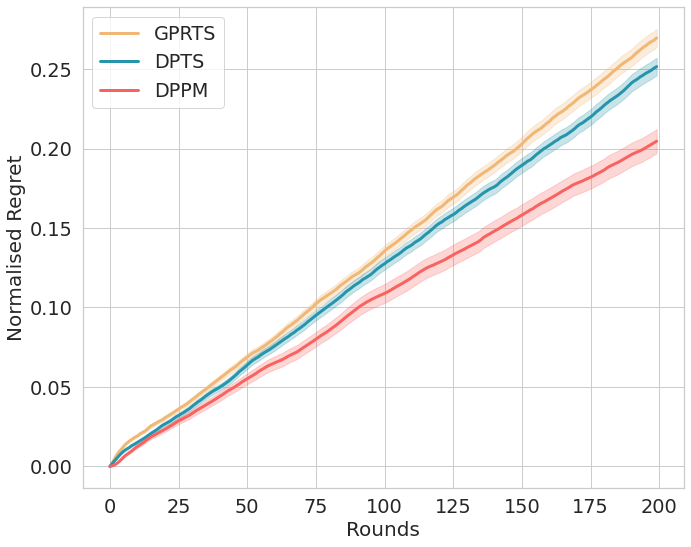

In [7]:
N = 250
T = 200

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment3 data/GPRTS_cost1.5.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment3 data/DPTS_cost1.5.csv'), delimiter=',')
regret_record3 = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment3 data/DPPM_cost1.5.csv'), delimiter=',')

regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)
regret_cumsum3=np.cumsum(regret_record3,axis=1)


cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)
cumsum_average3=np.mean(regret_cumsum3,axis=0)

cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)
cumsum_std3=np.sqrt(np.var(regret_cumsum3,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='GPRTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

plt.plot(cumsum_average2,label='DPTS',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.plot(cumsum_average3,label='DPPM',color='#fa625f',linewidth=3)
plt.fill_between(range(T), cumsum_average3-cumsum_std3, cumsum_average3+cumsum_std3,color='#fa625f', alpha=0.25)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.legend()

plt.savefig('SC1.5.png')

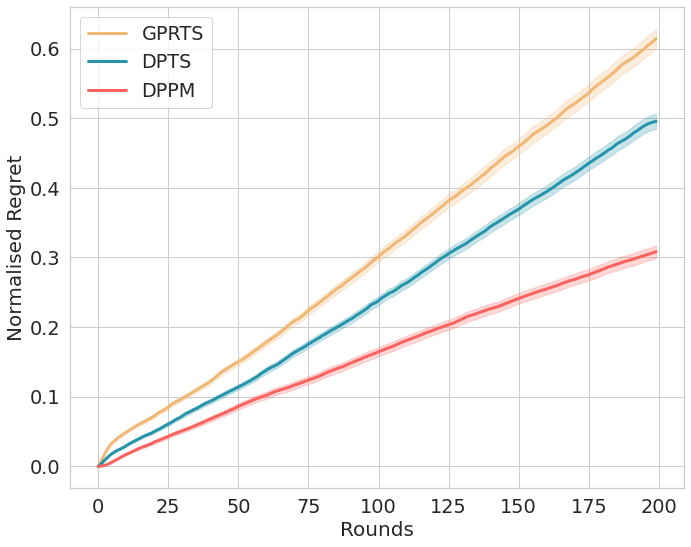

In [9]:
N = 250
T = 200

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment3 data/GPRTS_cost5.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment3 data/DPTS_cost5.csv'), delimiter=',')
regret_record3 = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment3 data/DPPM_cost5.csv'), delimiter=',')

regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)
regret_cumsum3=np.cumsum(regret_record3,axis=1)


cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)
cumsum_average3=np.mean(regret_cumsum3,axis=0)

cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)
cumsum_std3=np.sqrt(np.var(regret_cumsum3,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='GPRTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

plt.plot(cumsum_average2,label='DPTS',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.plot(cumsum_average3,label='DPPM',color='#fa625f',linewidth=3)
plt.fill_between(range(T), cumsum_average3-cumsum_std3, cumsum_average3+cumsum_std3,color='#fa625f', alpha=0.25)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
#plt.title('Switching Cost = 0')
plt.legend()

plt.savefig('SC5.png')

Text(0.5, 1.0, 'switching cost = 5')

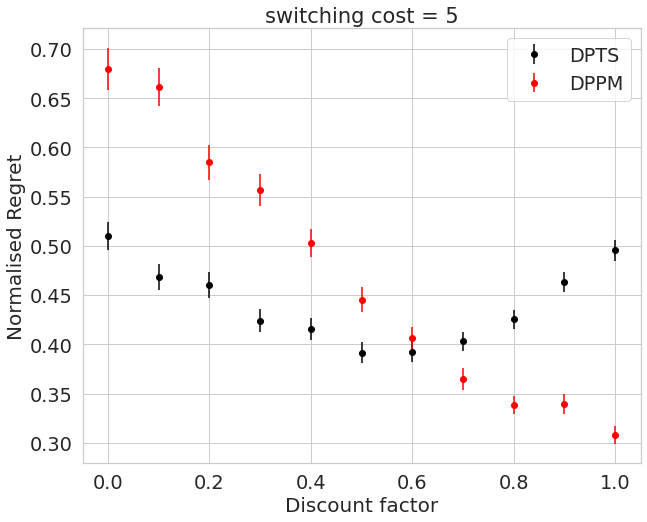

In [19]:
discount_factor_holder=[1.0, 0.9,0.8, 0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.]
plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

N = 250
T = 200


for df in discount_factor_holder:

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment4 data/DPTS_cost5_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    

    plt.errorbar(df, cumsum_average, yerr=cumsum_std,label='DPTS', fmt="o",color='black')
    plt.xlabel('Discount factor',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    
    
    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment4 data/DPPM_cost5_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    

    plt.errorbar(df, cumsum_average, yerr=cumsum_std, fmt="o",color='red',label='DPPM')
    plt.xlabel('Discount factor',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    if df==1.0:
        plt.legend()
    
    
#plt.savefig('plots/SC5_discount.png')
    
plt.title('switching cost = 5')

Text(0.5, 1.0, 'switching cost = 1.5')

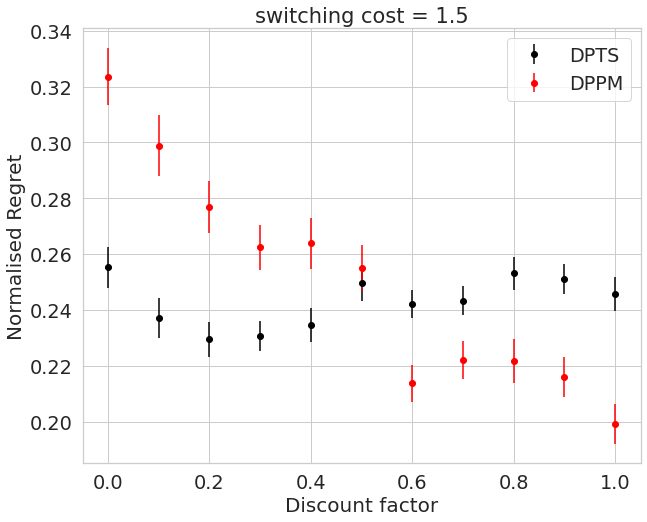

In [20]:
discount_factor_holder=[1.0, 0.9,0.8, 0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.]
plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

N = 250
T = 200


for df in discount_factor_holder:
    
    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment4 data/DPTS_cost1.5_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
   
    plt.errorbar(df, cumsum_average, yerr=cumsum_std, fmt="o",color='black',label='DPTS')
    plt.xlabel('Discount factor',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    
    
    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment4 data/DPPM_cost1.5_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    plt.errorbar(df, cumsum_average, yerr=cumsum_std, fmt="o",color='red',label='DPPM')
    plt.xlabel('Discount factor',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    if df==1.0:
        plt.legend()
    
   
    

    
plt.title('switching cost = 1.5')
#plt.savefig('plots/SC1.5_discount.png')

Text(0.5, 1.0, 'switching cost = 0.25')

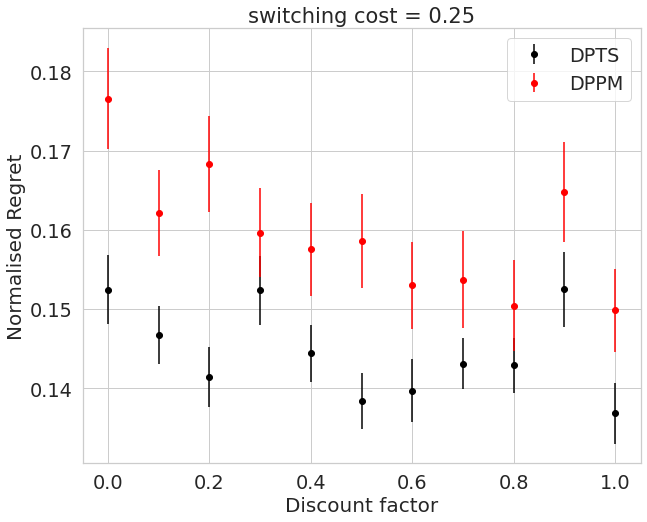

In [21]:
discount_factor_holder=[1., 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.]

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

for df in discount_factor_holder:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment4 data/DPTS_cost0.25_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
   
    plt.errorbar(df, cumsum_average, yerr=cumsum_std, fmt="o",color='black',label='DPTS')
    plt.xlabel('Discount factor',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    
    
    
    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment4 data/DPPM_cost0.25_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    

    plt.errorbar(df, cumsum_average, yerr=cumsum_std, fmt="o",color='red',label='DPPM')
    plt.xlabel('Discount factor',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    if df==1.0:
        plt.legend()

plt.title('switching cost = 0.25')
#plt.savefig('plots/SC0.25_discount.png')

Text(0.5, 1.0, 'switching cost = 10')

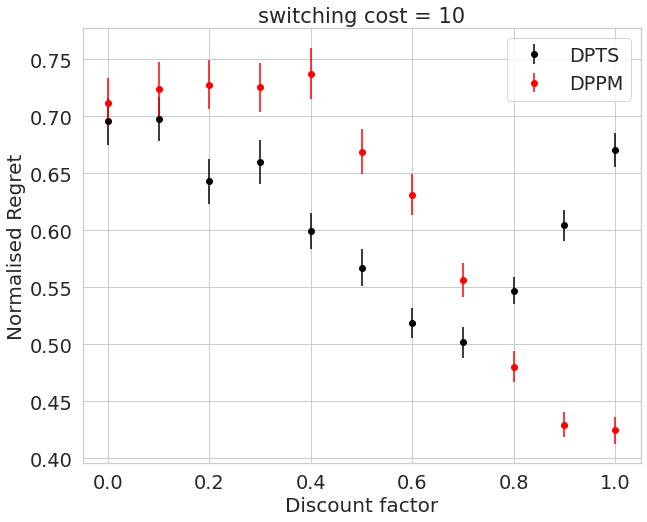

In [17]:
discount_factor_holder = [1., 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.]

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

for df in discount_factor_holder:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment4 data/DPTS_cost10_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(df, cumsum_average, yerr=cumsum_std, fmt="o",color='black',label='DPTS')
    #plt.ylim(0.175,0.225)
    plt.xlabel('Discount factor',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    
    #data.append(regret_cumsum[:,-1])
    
    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment4 data/DPPM_cost10_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(df, cumsum_average, yerr=cumsum_std, fmt="o",color='red',label='DPPM')
    #plt.ylim(0.175,0.225)
    plt.xlabel('Discount factor',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    if df==1.0:
        plt.legend()
    
plt.title('switching cost = 10')
#plt.savefig('plots/SC10_discount.png')